In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from glob import glob

import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

C:\Users\sande\anaconda3\envs\gpuTF\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
model = load_model("DeepLabV3Plus.h5")

In [3]:
IMAGE_SIZE = 224
DATA_DIR = "./DataSet/Training/"
NUM_TRAIN_IMAGES = 7000

train_images = sorted(glob(os.path.join(DATA_DIR, "im/*")))[:NUM_TRAIN_IMAGES]
train_masks = sorted(glob(os.path.join(DATA_DIR, "gt_categorized/*")))[:NUM_TRAIN_IMAGES]
val_images = sorted(glob(os.path.join(DATA_DIR, "im/*")))[NUM_TRAIN_IMAGES:]
val_masks = sorted(glob(os.path.join(DATA_DIR, "gt_categorized/*")))[NUM_TRAIN_IMAGES:]


def read_bmp_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_bmp(image, channels=3)
    image.set_shape([None, None, 3])
    image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
    image = image/255
    return image

def read_bmp_mask(image_path, mask=False):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_bmp(image, channels=0)
    image.set_shape([None, None, 1])
    image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
    return image

def read_jpeg_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image.set_shape([None, None, 3])
    image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
    image = image/255
    return image

In [4]:
def prediction(model, image_tensor):
    predictions = model.predict(np.expand_dims(image_tensor, axis=0))
    predictions = np.squeeze(predictions)
    predictions = np.argmax(predictions, axis=2)
    return predictions

1/1 [==============================] - 0s 117ms/step


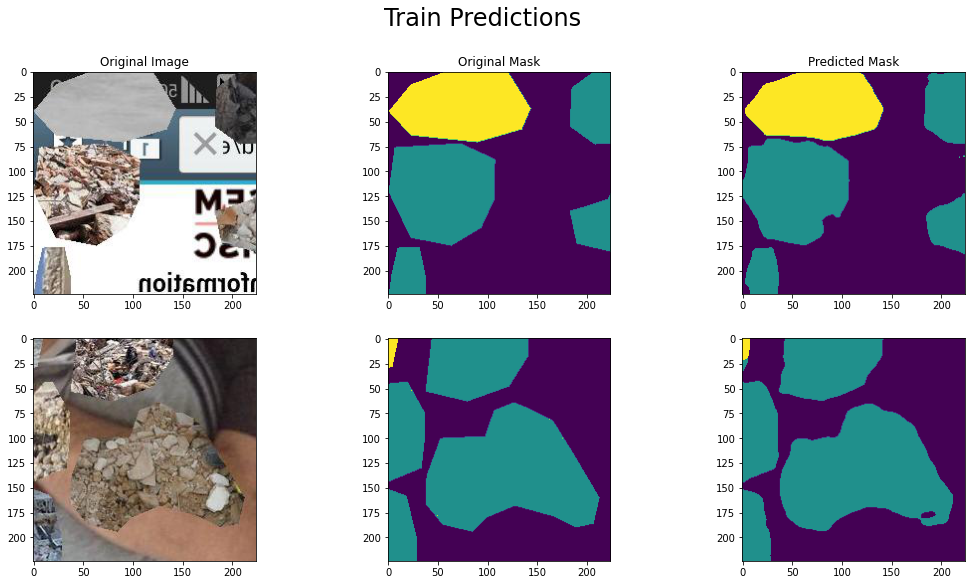

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 9))
axes[0, 0].imshow(read_bmp_image(train_images[0]))
axes[0, 1].imshow(read_bmp_mask(train_masks[0]))
axes[0, 2].imshow(prediction(model, read_bmp_image(train_images[0])))

axes[0, 0].set_title("Original Image")
axes[0, 1].set_title("Original Mask")
axes[0, 2].set_title("Predicted Mask")

axes[1, 0].imshow(read_bmp_image(train_images[1000]))
axes[1, 1].imshow(read_bmp_mask(train_masks[1000]))
axes[1, 2].imshow(prediction(model, read_bmp_image(train_images[1000])))

fig.suptitle("Train Predictions", fontsize=24)
plt.show()

1/1 [==============================] - 0s 116ms/step


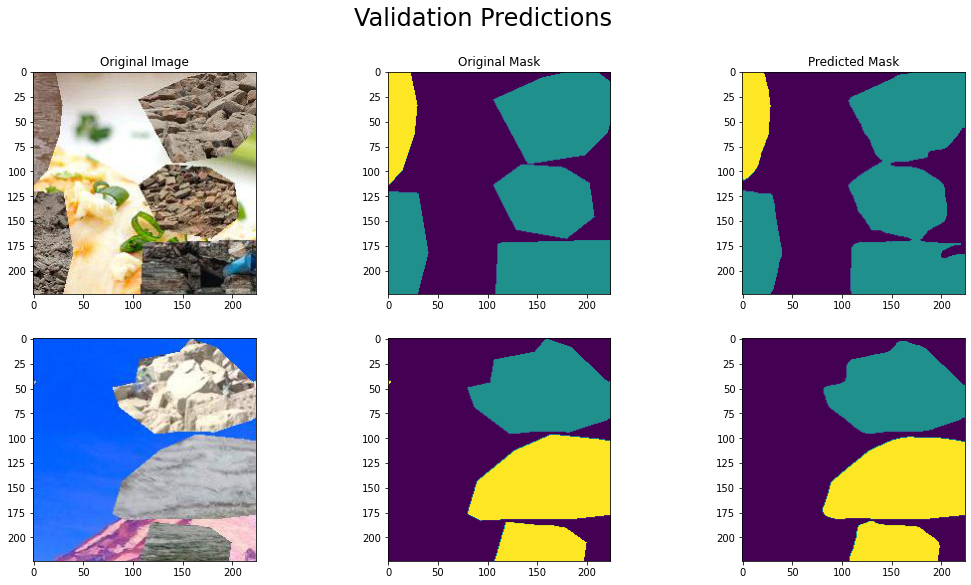

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 9))
axes[0, 0].imshow(read_bmp_image(val_images[0]))
axes[0, 1].imshow(read_bmp_mask(val_masks[0]))
axes[0, 2].imshow(prediction(model, read_bmp_image(val_images[0])))

axes[0, 0].set_title("Original Image")
axes[0, 1].set_title("Original Mask")
axes[0, 2].set_title("Predicted Mask")

axes[1, 0].imshow(read_bmp_image(val_images[700]))
axes[1, 1].imshow(read_bmp_mask(val_masks[700]))
axes[1, 2].imshow(prediction(model, read_bmp_image(val_images[700])))

fig.suptitle("Validation Predictions", fontsize=24)
plt.show()